# 중국 미세먼지 데이터 조사

Specie 데이터 설명:(https://www.me.go.kr/mamo/web/index.do?menuId=586)

'o3': 오존(O3), 
양호 기준: 8시간평균치 0.06ppm 이하 1시간평균치 0.1ppm 이하

'so2': 아황산가스
양호 기준:
연간평균치 0.02ppm 이하
24시간평균치 0.05ppm 이하
1시간평균치 0.15ppm 이하

'pm25': 초미세먼지(PM2.5)
양호 기준:
연간평균치 15㎍/㎥ 이하
24시간평균치 35㎍/㎥ 이하

pm10:미세먼지(PM100)
양호 기준:
연간평균치 50㎍/㎥ 이하
24시간평균치 100㎍/㎥ 이하


'no2': 이산화질소
양호 기준:
연간평균치 0.03ppm 이하
24시간평균치 0.06ppm 이하
1시간평균치 0.10ppm 이하

'co':일산화탄소
양호 기준:
8시간평균치 9ppm 이하
1시간평균치 25ppm 이하

'wind-gust': 돌풍, 풍속

'aqi':Air Quality Index, 공기질 지수

## 전처리

In [1]:
import pandas as pd
import numpy as np

In [2]:
df21=pd.read_csv("waqi-covid19-airqualitydata-2021Q4.csv", encoding='latin-1')

In [12]:
df21.shape

(548423, 9)

In [13]:
df21.nunique()

Date            98
Country         94
City           623
Specie          52
count         2003
min           4020
max           4753
median        4265
variance    174153
dtype: int64

In [14]:
df21.head()
#21년도의 전세계 데이터 중 중국의 데이터만 볼 거이므로 따로 빼준다.

,Date,Country,City,Specie,count,min,max,median,variance
0,2021-10-24,BH,Manama,pressure,24.0,1009.4,1013.0,1010.7,11.89
1,2021-11-12,BH,Manama,pressure,24.0,1011.4,1015.3,1013.6,18.44
2,2021-11-27,BH,Manama,pressure,24.0,1014.1,1017.3,1015.8,8.13
3,2021-12-10,BH,Manama,pressure,24.0,1019.3,1022.7,1020.7,9.65
4,2021-12-22,BH,Manama,pressure,24.0,1016.7,1020.1,1017.5,11.27


In [3]:
df_cn=df21[df21["Country"].str.contains("CN")]
df_cn

,Date,Country,City,Specie,count,min,max,median,variance
281907,2021-11-18,CN,Beijing,o3,220.0,0.5,26.4,1.7,103.01
281908,2022-01-01,CN,Beijing,o3,237.0,0.5,30.1,13.0,1264.43
281909,2021-10-18,CN,Beijing,o3,237.0,0.5,26.4,6.5,552.08
281910,2021-10-29,CN,Beijing,o3,194.0,0.5,29.7,5.3,646.44
281911,2021-11-09,CN,Beijing,o3,284.0,13.0,29.7,24.0,103.92
...,...,...,...,...,...,...,...,...,...
328402,2021-11-25,CN,Dongguan,wind-gust,5.0,10.8,10.8,10.8,0.00
328403,2021-12-23,CN,Dongguan,wind-gust,22.0,0.7,5.0,2.8,14.40
328404,2021-12-31,CN,Dongguan,wind-gust,16.0,1.7,5.5,3.6,14.71
328405,2022-01-02,CN,Dongguan,wind-gust,22.0,0.2,6.6,1.6,38.66


In [23]:
df_cn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46500 entries, 281907 to 328406
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      46500 non-null  object 
 1   Country   46500 non-null  object 
 2   City      46500 non-null  object 
 3   Specie    46500 non-null  object 
 4   count     46500 non-null  float64
 5   min       46500 non-null  float64
 6   max       46500 non-null  float64
 7   median    46500 non-null  float64
 8   variance  46500 non-null  float64
dtypes: float64(5), object(4)
memory usage: 3.5+ MB


In [4]:
df_cn.describe(include="object")
#describe를 통해 21년도 중국 52개 도시에서 모은 데이터가 있음을 알 수 있다.

,Date,Country,City,Specie
count,46500,46500,46500,46500
unique,98,1,52,14
top,2021-11-07,CN,Xuchang,so2
freq,538,46500,1091,5018


In [5]:
df_cn["City"].value_counts(normalize=True)
#이를 통해 각 도시에서 완벽히 같은 양의 데이터를 모은 건 아니지만 대략 비슷한 양의 데이터를 모았다는 걸 알 수 있다.

Xuchang         0.023462
Zhengzhou       0.023462
Qingdao         0.022968
Guangzhou       0.022882
Nanjing         0.022882
Hangzhou        0.022860
Jieyang         0.022839
Shantou         0.022839
Suzhou          0.022151
Shanghai        0.022086
Shijiazhuang    0.021892
Changzhou       0.021763
Xinxiang        0.021355
Dongguan        0.021269
Foshan          0.021118
Beijing         0.020882
Shiyan          0.020817
Fushun          0.020688
Shenyang        0.020688
Hegang          0.020667
Changchun       0.020581
Taiyuan         0.020538
Ningbo          0.020538
Harbin          0.020452
Hefei           0.020409
Haikou          0.020409
Nanning         0.020409
Kunming         0.020409
Changsha        0.020366
Xiamen          0.020366
Zhuzhou         0.020366
Chengdu         0.020344
ÃrÃ¼mqi        0.020344
Lanzhou         0.020323
Guiyang         0.020323
Xi?an          0.020301
Chongqing       0.020301
Shenzhen        0.019699
Hohhot          0.018473
Tianjin         0.018452


In [6]:
df_cn["Specie"].unique()
#'pm25', 'pm10' 같은 미세먼지 데이터 외에도 'wind-speed', 'wind-gust', 'so2'와 같은 기상 데이터도 포함돼 있음을 알 수 있다.

array(['o3', 'humidity', 'so2', 'pm25', 'no2', 'dew', 'co', 'temperature',
       'pm10', 'pressure', 'wind-speed', 'wind-gust', 'aqi',
       'precipitation'], dtype=object)

In [7]:
df_cn["City"].unique()
#한국의 미세먼지에 중국이 끼치는 영향을 조사하기 위해서: 
#중국 전역의 미세먼지 데이터가 아니라 한국과 밀접하고, 
#중국 내 연간 미세먼지 배출 상위에 드는 중국의 도시들의 데이터를 선택합니다.
#중국 내 연간 미세먼지 배출 상위 지역 출처: https://www.hankookilbo.com/News/Read/201701030464184899
#선택 도시('Jinan', 'Beijing', 'Shijiazhuang', 'Nanjing', 'Zhengzhou')

array(['Beijing', 'Jieyang', 'Kunming', 'Hangzhou', 'Chongqing',
       'Qingdao', 'Haikou', 'Ã\x9crÃ¼mqi', 'Qiqihar', 'Guiyang',
       'Shenzhen', 'Yunfu', 'Xuchang', 'Yinchuan', 'Shenyang', 'Lhasa',
       'Shanghai', 'Changchun', 'Foshan', 'Nanning', 'Fushun', 'Hefei',
       'Chengdu', 'Hohhot', 'Qinhuangdao', 'Shijiazhuang', 'Shantou',
       'Zhengzhou', 'Nanjing', 'Xining', 'Xi?\x99an', 'Zhuzhou', 'Wuhan',
       'Tianjin', 'Changzhou', 'Nanchang', 'Shiyan', 'Xinxiang', 'Suzhou',
       'Harbin', 'Lanzhou', 'Jinan', 'Changsha', 'Hegang', 'Anyang',
       'Wuxi', 'Taiyuan', 'Guangzhou', 'Fuzhou', 'Ningbo', 'Xiamen',
       'Dongguan'], dtype=object)

In [8]:
df_21_q4= df_cn[df_cn["City"].isin(['Jinan', 'Beijing', 'Shijiazhuang', 'Nanjing', 'Zhengzhou'])]
df_21_q4

,Date,Country,City,Specie,count,min,max,median,variance
281907,2021-11-18,CN,Beijing,o3,220.0,0.5,26.4,1.7,103.01
281908,2022-01-01,CN,Beijing,o3,237.0,0.5,30.1,13.0,1264.43
281909,2021-10-18,CN,Beijing,o3,237.0,0.5,26.4,6.5,552.08
281910,2021-10-29,CN,Beijing,o3,194.0,0.5,29.7,5.3,646.44
281911,2021-11-09,CN,Beijing,o3,284.0,13.0,29.7,24.0,103.92
...,...,...,...,...,...,...,...,...,...
319563,2021-11-05,CN,Jinan,pm25,341.0,30.0,199.0,152.0,15301.00
319564,2021-12-05,CN,Jinan,pm25,352.0,61.0,163.0,122.0,5409.69
319565,2021-12-09,CN,Jinan,pm25,344.0,93.0,233.0,153.0,5547.22
319566,2021-12-11,CN,Jinan,pm25,352.0,93.0,252.0,173.0,9272.23


위의 과정을 통해 2021년 4분기 전세계 미세먼지 데이터셋에서 중국 5개 도시의 데이터셋만을 추출할 수 있었다.

이제 윗 과정을 def함수를 통해 정리하고, 다른 기간의 데이터셋들("21년1,2,3 분기/ 20년 1~ 4분기/2019년 1 ~ 4분기/ 2018년/ 2017년/ 2016년/ 2015년"에 적용해 각 연도 별 중국 5개 도시의 미세먼지 데이터셋들을 만들자)

In [9]:
#15년도 데이터셋 가져오기
df15=pd.read_csv("waqi-covid19-airqualitydata-2015.csv", encoding='latin-1')

In [10]:
def get_city_data_list(df_yr):
    df_cn=df_yr[df_yr["Country"].str.contains("CN")]
    df_city= df_cn[df_cn["City"].isin(['Jinan', 'Beijing', 'Shijiazhuang', 'Nanjing', 'Zhengzhou'])]
    
    return df_city

In [11]:
# 함수가 잘 만들어졌는지 확인하기
df_yr = df15
df_15=get_city_data_list(df_yr)
df_15

,Date,Country,City,Specie,count,min,max,median,variance
306783,2015-01-04,CN,Beijing,pm25,450.0,80.0,494.0,255.0,65212.90
306784,2015-01-12,CN,Beijing,pm25,449.0,91.0,326.0,181.0,8349.02
306785,2015-02-17,CN,Beijing,pm25,336.0,13.0,197.0,68.0,10622.50
306786,2015-06-11,CN,Beijing,pm25,416.0,13.0,209.0,57.0,30655.90
306787,2015-06-13,CN,Beijing,pm25,446.0,13.0,140.0,42.0,5978.25
...,...,...,...,...,...,...,...,...,...
353608,2015-04-23,CN,Jinan,pm10,333.0,33.0,163.0,92.0,3872.85
353609,2015-04-25,CN,Jinan,pm10,332.0,4.0,477.0,109.0,46057.50
353610,2015-06-01,CN,Jinan,pm10,210.0,65.0,155.0,93.0,3074.36
353611,2015-06-11,CN,Jinan,pm10,335.0,1.0,268.0,69.0,8702.85


In [12]:
#16, 17, 18년도 데이터셋 가져오기
df16=pd.read_csv("waqi-covid19-airqualitydata-2016H1.csv", encoding='latin-1')
df17=pd.read_csv("waqi-covid19-airqualitydata-2017H1.csv", encoding='latin-1')
df18=pd.read_csv("waqi-covid19-airqualitydata-2018H1.csv", encoding='latin-1')

In [13]:
# 16년도 데이터셋으로 만들기
df_yr = df16
df_16=get_city_data_list(df_yr)

In [14]:
# 17년도 데이터셋으로 만들기
df_yr = df17
df_17=get_city_data_list(df_yr)

In [15]:
# 18년도 데이터셋으로 만들기
df_yr = df18
df_18=get_city_data_list(df_yr)

19, 20, 21년도는 1,2,3,4 분기로 데이터가 나뉘어져 있어서 합쳐야 함.

In [16]:
#19년도 1,2,3,4 분기 데이터셋 가져오기

df19_q1=pd.read_csv("waqi-covid19-airqualitydata-2019Q1.csv", encoding='latin-1')
df19_q2=pd.read_csv("waqi-covid19-airqualitydata-2019Q2.csv", encoding='latin-1')
df19_q3=pd.read_csv("waqi-covid19-airqualitydata-2019Q3.csv", encoding='latin-1')
df19_q4=pd.read_csv("waqi-covid19-airqualitydata-2019Q4.csv", encoding='latin-1')

# 분기 별 데이터셋으로 만들기
#1분기
df_yr = df19_q1
df_19_q1=get_city_data_list(df_yr)

#2분기
df_yr = df19_q2
df_19_q2=get_city_data_list(df_yr)

#3분기
df_yr = df19_q3
df_19_q3=get_city_data_list(df_yr)

#4분기
df_yr = df19_q4
df_19_q4=get_city_data_list(df_yr)

#19년도 분기별 데이터를 합쳐서 19년 연간 데이터셋 만들기
df_19 = pd.concat([df_19_q1, df_19_q2, df_19_q3, df_19_q4], join='inner')


In [17]:
#20년도 1,2,3,4 분기 데이터셋 가져오기
df20_q1=pd.read_csv("waqi-covid19-airqualitydata-2020Q1.csv", encoding='latin-1')
df20_q2=pd.read_csv("waqi-covid19-airqualitydata-2020Q2.csv", encoding='latin-1')
df20_q3=pd.read_csv("waqi-covid19-airqualitydata-2020Q3.csv", encoding='latin-1')
df20_q4=pd.read_csv("waqi-covid19-airqualitydata-2020Q4.csv", encoding='latin-1')

In [18]:
# 분기 별 데이터셋으로 만들기
#1분기
df_yr = df20_q1
df_20_q1=get_city_data_list(df_yr)

#2분기
df_yr = df20_q2
df_20_q2=get_city_data_list(df_yr)

#3분기
df_yr = df20_q3
df_20_q3=get_city_data_list(df_yr)

#4분기
df_yr = df20_q4
df_20_q4=get_city_data_list(df_yr)

In [19]:
#20년도 분기별 데이터를 합쳐서 20년 연간 데이터셋 만들기
df_20 = pd.concat([df_20_q1, df_20_q2, df_20_q3, df_20_q4], join='inner')

In [20]:
#21년도 1,2,3 분기 데이터셋 가져오기

df21_q1=pd.read_csv("waqi-covid19-airqualitydata-2021Q1.csv", encoding='latin-1')
df21_q2=pd.read_csv("waqi-covid19-airqualitydata-2021Q2.csv", encoding='latin-1')
df21_q3=pd.read_csv("waqi-covid19-airqualitydata-2021Q3.csv", encoding='latin-1')


In [21]:
# 분기 별 데이터셋으로 만들기
#1분기
df_yr = df21_q1
df_21_q1=get_city_data_list(df_yr)

#2분기
df_yr = df21_q2
df_21_q2=get_city_data_list(df_yr)

#3분기
df_yr = df21_q3
df_21_q3=get_city_data_list(df_yr)

In [22]:
#21년도 분기별 데이터를 합쳐서 21년 연간 데이터셋 만들기
df_21 = pd.concat([df_21_q1, df_21_q2, df_21_q3, df_21_q4], join='inner')

In [35]:
#15년~22년도 데이터 모두 모아서 저장하기
df_all = pd.concat([df_15, df_16, df_17, df_18, df_19, df_20, df_21], join='inner').reset_index(drop=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90169 entries, 0 to 90168
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      90169 non-null  object 
 1   Country   90169 non-null  object 
 2   City      90169 non-null  object 
 3   Specie    90169 non-null  object 
 4   count     90169 non-null  float64
 5   min       90169 non-null  float64
 6   max       90169 non-null  float64
 7   median    90169 non-null  float64
 8   variance  90169 non-null  float64
dtypes: float64(5), object(4)
memory usage: 6.2+ MB


데이터 타입 변경

In [36]:
#"DATE"는 연-월-일을 나타내는 날짜 데이터입니다. 그러나 info() 메서드를 통해 확인한 결과 자료형이 int 입니다. 
# 따라서 pandas에서 지원하는 날짜형 데이터형으로 변환하겠습니다.

In [37]:
df_all['Date'] = pd.to_datetime(df_all['Date'])

In [38]:
# "Date" 변수를 다양하게 분석할 수 있도록 나누겠습니다.
# 연, 월, 일로 변수를 나누겠습니다.

df_all['year'] = df_all['Date'].dt.year
df_all['month'] = df_all['Date'].dt.month
df_all['day'] = df_all['Date'].dt.day

In [39]:
# 데이터를 확인합니다.
df_all.head(2)

,Date,Country,City,Specie,count,min,max,median,variance,year,month,day
0,2015-01-04,CN,Beijing,pm25,450.0,80.0,494.0,255.0,65212.90,2015,1,4
1,2015-01-12,CN,Beijing,pm25,449.0,91.0,326.0,181.0,8349.02,2015,1,12


In [40]:
#CSV파일로 저장
file_name = "df_CN_all.csv"
df_all.to_csv(file_name, index = False)

## 본격 EDA 해보기

In [41]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

### 상관관계 구하기

In [73]:
df_specie_pivot = pd.pivot_table(df_all,                # 피벗할 데이터프레임
                     index = ['City','Date'],    # 행 위치에 들어갈 열
                     columns = 'Specie',    # 열 위치에 들어갈 열
                     values = 'median')     # 데이터로 사용할 열
df_specie_pivot

Specie                aqi    co   d   dew  humidity   no2    o3   pm10   pm25  \
City      Date                                                                  
Beijing   2014-12-29  NaN  32.6 NaN   NaN       NaN  51.0   3.7  118.0  190.0   
          2014-12-30  NaN  11.8 NaN   NaN       NaN  31.1   9.0   61.0   90.0   
          2014-12-31  NaN   2.8 NaN   NaN       NaN   6.9  21.4   44.0   34.0   
          2015-01-01  NaN  11.8 NaN   NaN       NaN  25.6  10.6   66.0  155.0   
          2015-01-02  NaN  13.6 NaN   NaN       NaN  32.0   6.5   74.0  154.0   
...                   ...   ...  ..   ...       ...   ...   ...    ...    ...   
Zhengzhou 2021-12-29  NaN   7.6 NaN -13.0      29.0  11.5  21.2   55.0  102.0   
          2021-12-30  NaN   7.3 NaN -14.0      29.0  10.6  22.0   51.0   87.0   
          2021-12-31  NaN  10.7 NaN -10.0      38.0  32.5   3.3   73.0  151.0   
          2022-01-01  NaN   8.4 NaN  -9.0      40.0  27.0  11.8   70.0  155.0   
          2022-01-02  NaN  10.0 NaN  -8.0      44.0  25.6   7.4   79.0  161.0   

Specie                pol  precipitation  pressure   so2  temperature  wd  \
City      Date                                                              
Beijing   2014-12-29  NaN            NaN       NaN  23.4          NaN NaN   
          2014-12-30  NaN            NaN       NaN  14.2          NaN NaN   
          2014-12-31  NaN            NaN       NaN   4.3          NaN NaN   
          2015-01-01  NaN            NaN       NaN  15.2          NaN NaN   
          2015-01-02  NaN            NaN       NaN  16.8          NaN NaN   
...                   ...            ...       ...   ...          ...  ..   
Zhengzhou 2021-12-29  NaN            NaN    1029.0   6.1          4.0 NaN   
          2021-12-30  NaN            NaN    1031.0   6.1          3.0 NaN   
          2021-12-31  NaN            NaN    1032.0   8.2          5.0 NaN   
          2022-01-01  NaN            NaN    1026.0   7.1          3.0 NaN   
          2022-01-02  NaN            NaN    1029.0   7.1          2.0 NaN   

Specie                wind gust  wind speed  wind-gust  wind-speed  
City      Date                                                      
Beijing   2014-12-29        NaN         NaN        NaN         NaN  
          2014-12-30        NaN         NaN        NaN         NaN  
          2014-12-31        NaN         NaN        NaN         NaN  
          2015-01-01        NaN         NaN        NaN         NaN  
          2015-01-02        NaN         NaN        NaN         NaN  
...                         ...         ...        ...         ...  
Zhengzhou 2021-12-29        NaN         NaN       11.8         4.6  
          2021-12-30        NaN         NaN        NaN         2.5  
          2021-12-31        NaN         NaN        NaN         1.5  
          2022-01-01        NaN         NaN        NaN         0.5  
          2022-01-02        NaN         NaN        NaN         2.5  

[9220 rows x 19 columns]

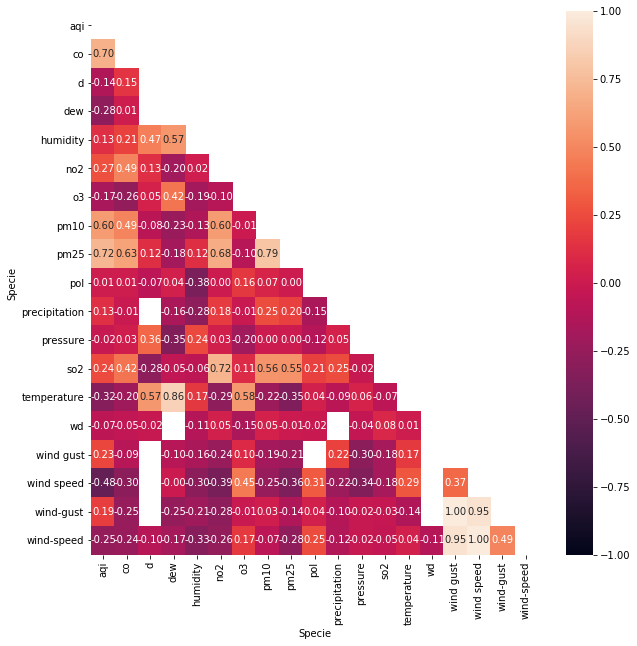

In [74]:
# 피어슨 상관계수를 이용해 각 열의 상관관계를 구합니다.
df_corr=df_specie_pivot.corr(method='pearson')

#ones_like의 의의=> 히트맵 가운데 선 위의 숫자들=>1.*, 히트맵 가운데 선 아래 숫자들=>0.*로 설정
#triu의 의의=> 히트맵 위의 숫자들만 선택
mask=np.triu(np.ones_like(df_corr))

plt.figure(figsize=(10,10))
sns.heatmap(df_corr, annot=True, fmt='.2f', vmin=-1, vmax=1, mask=mask)
# fmt=포맷의 약자
#".2f=" 소수점 2자리 수까지 표현
#vmin=최소값 설정
#mask=마주보고 있는 값 없애기

In [72]:
#미세먼지(pm10)은 no2(이산화질소) 와 co(일산화탄소)뚜렷한 양적 선형관계
#미세먼지(pm10)은 dew(이슬량) 와 humidity(습도)약한 음적 선형관계. 그러나 precipitation(강수량)은 pm10과 약한 양적 선형관계
#-> 비가 대기질에 미치는 영향 미미.


# wind_gust, winde speed가 pm10, pm25와 약한 음적 선형관계 -> 바람이 불 수록 오히려 미세먼지가 늘어난다는 가설 가능.
# 그런데 aqi와 wind gust는 약한 양적 관계 (바람 불수록 대기질 좋아짐), wind speed와 aqi는 뚜렷한 음적 선형관계(바람 불 수록 대기질 나빠짐)
# 가설: wind gust, wind speed가 높으면 겨울이므로 대기질 안 좋음

# temperature은 aqi(Air Qulity Index), pm25와 뚜렷한 음적 선형관계 | 03(오존)과 뚜렷한 양적 선형관계
#겨울 되면 난방으로 대기질 나빠지고, 북반구의 오존전량은 봄에 뚜렷한 최대값을 갖고 여름부터 가을까지 값이 낮아지는 계절변동을 보이므로.



일반적으로(https://www.inflearn.com/questions/142289)

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,

r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,

r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,

r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,

r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,

r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,

r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

### pm2.5 초미세먼지 EDA

In [45]:
#pm 2.5이하인 초미세먼지 데이터만 EDA를 해보자.
df_pm25=df_all[df_all["Specie"].str.contains("pm25")]
#df_pm25

,Date,Country,City,Specie,count,min,max,median,variance,year,month,day
0,2015-01-04,CN,Beijing,pm25,450.0,80.0,494.0,255.0,65212.90,2015,1,4
1,2015-01-12,CN,Beijing,pm25,449.0,91.0,326.0,181.0,8349.02,2015,1,12
2,2015-02-17,CN,Beijing,pm25,336.0,13.0,197.0,68.0,10622.50,2015,2,17
3,2015-06-11,CN,Beijing,pm25,416.0,13.0,209.0,57.0,30655.90,2015,6,11
4,2015-06-13,CN,Beijing,pm25,446.0,13.0,140.0,42.0,5978.25,2015,6,13
...,...,...,...,...,...,...,...,...,...,...,...,...
90164,2021-11-05,CN,Jinan,pm25,341.0,30.0,199.0,152.0,15301.00,2021,11,5
90165,2021-12-05,CN,Jinan,pm25,352.0,61.0,163.0,122.0,5409.69,2021,12,5
90166,2021-12-09,CN,Jinan,pm25,344.0,93.0,233.0,153.0,5547.22,2021,12,9
90167,2021-12-11,CN,Jinan,pm25,352.0,93.0,252.0,173.0,9272.23,2021,12,11


In [75]:
# 초미세먼지 최대값

df_pm25["max"].max()

999.0

In [56]:
df_pm25.loc[df_pm25["max"]==999.0, ["Date", "City", "median", "min"]]
#이 결과 "Shijiazhuang"이 가장 pm 2.5이하의 미세먼지가 자주 나오는 도시이다.
# 21년도 후반기 부터는 "Nanjing"에서 많은 미세먼지가 만들어졌다.
# max는 999인 반면 min은 21로 초미세먼지 변동폭이 매우 심하다.

#한국의 초미세먼지(pm2.5 이하) 기준:(http://www.me.go.kr/home/web/board/read.do?menuId=286&boardMasterId=1&boardCategoryId=39&boardId=849570)
# 0~15: 좋음
# 16~35: 보통
# 36~75: 나쁨
# 76~ : 매우 나쁨

,Date,City,median,min
1562,2015-02-05,Shijiazhuang,132.0,21.0
1672,2015-06-03,Shijiazhuang,147.0,9.0
2337,2015-06-13,Zhengzhou,127.0,55.0
2369,2015-06-25,Zhengzhou,89.0,13.0
2430,2015-06-24,Zhengzhou,59.0,5.0
14068,2017-04-25,Shijiazhuang,78.0,21.0
20435,2018-05-23,Shijiazhuang,102.0,25.0
20483,2018-04-21,Shijiazhuang,157.0,30.0
20507,2018-04-13,Shijiazhuang,104.0,21.0
20515,2018-05-21,Shijiazhuang,134.0,21.0


In [76]:
#초미세먼지 중간값 최대값

df_pm25["median"].max()

999.0

In [58]:
df_pm25.loc[df_pm25["median"]==999.0, ["Date", "City", "min"]]

#중간값이 999이상인 날은 2021년 7월 이틀 동안인데 모두 "Shijiazhuang"이다.

,Date,City,min
81311,2021-07-08,Shijiazhuang,17.0
81337,2021-07-09,Shijiazhuang,1.0


### 월별 초미세먼지 추이

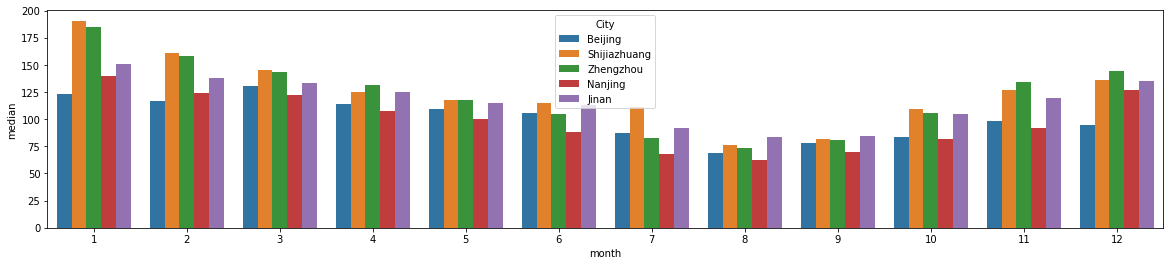

In [60]:
# barplot 으로 월별 도시 별 초미세먼지 중간값을 시각화 합니다.
plt.figure(figsize=(20, 4))
sns.barplot(data=df_pm25, x="month", y="median", hue = 'City', ci=None)

# 대체로 겨울 기간 동안 초미세먼지가 증가하는 패턴을 볼 수 있습니다(난방 때문으로 추정)
# Zhengzhou, Shijiazhuang이 대부분의 경우 가장 많은 매연을 배출하고, 대체로 Beijing이 낮고 변동이 적은 미세먼지를 배출합니다.

### 15~22 사이 도시 별 초미세먼지 변화 추이

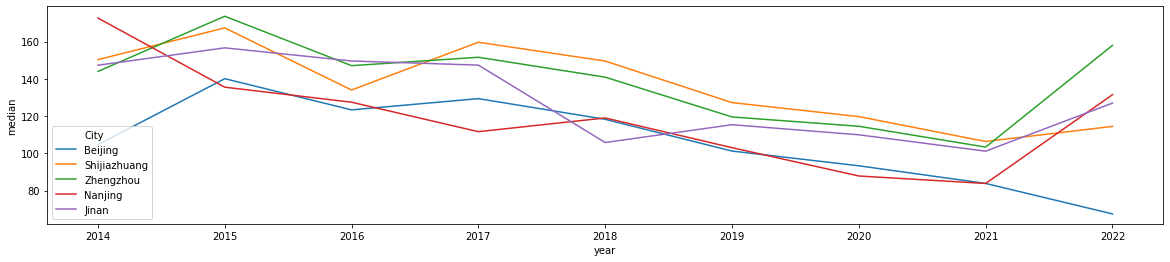

In [65]:
# lineplot 으로 15~22 동안 도시 별 중간값을 시각화 합니다.
plt.figure(figsize=(20, 4))
sns.lineplot(data=df_pm25, x="year", y="median", hue = 'City', ci=None)

# 2015년 부터 하락세 였던 초미세먼지가 2022년에 급등한 것을 볼 수 있습니다.
# 베이징의 경우에만 초미세먼지가 꾸준히 감소하고 있음을 알 수 있습니다.